In [95]:
from FC.FC_save_load_global_hook_dict import load_csv_to_dict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import norm

# **Wiederholungsgenauigkeit**

In [41]:
dict_1 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/1/global_hook_dict_horizontal.csv')
dict_2 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/2/global_hook_dict_horizontal.csv')
dict_3 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/3/global_hook_dict_horizontal.csv')
dict_4 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/4/global_hook_dict_horizontal.csv')
dict_5 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/5/global_hook_dict_horizontal.csv')
dict_6 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/6/global_hook_dict_horizontal.csv')
dict_7 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/7/global_hook_dict_horizontal.csv')
dict_8 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/8/global_hook_dict_horizontal.csv')
dict_9 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/9/global_hook_dict_horizontal.csv')
dict_10 = load_csv_to_dict('/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/10/global_hook_dict_horizontal.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mo/Thesis/Evaluation/1_Scan-Prozess/6_Wiederholungsgenauigkeit/csv/10/global_hook_dict_horizontal.csv'

In [46]:
dicts_list = [dict_1, dict_2, dict_3, dict_4, dict_5, dict_6, dict_7, dict_8, dict_9]

In [74]:
def calculate_mean(dicts_list = None):
    """
    Berechnet für alle Koordnaten (Spitze und Senke) den Mittelwert X_mean, Y_mean, Z_mean für jeden Haken"
    """
    mean_xyz_tip_in_workframe = []
    mean_xyz_lowpoint_in_workframe = []

    for hook_idx in range(len(dicts_list[0])):
        # hole Haken x aus allen dicts und berechne Summe
        sum_xyz_tip = np.zeros(3)
        sum_xyz_lowpoint = np.zeros(3)
        
        dict_key = str(hook_idx + 1)
        for dict in (dicts_list):
            xyz_tip_in_workframe = dict[dict_key]['xyz_tip_in_workframe']
            xyz_lowpoint_in_workframe = dict[dict_key]['xyz_lowpoint_in_workframe']
            sum_xyz_tip += xyz_tip_in_workframe
            sum_xyz_lowpoint += xyz_lowpoint_in_workframe
        
        # Berechne Mittelwert für Haken x und hänge an Ergebnis-Liste dran
        tip_mean = sum_xyz_tip / len(dicts_list)
        lowpoint_mean = sum_xyz_lowpoint / len(dicts_list)
        mean_xyz_tip_in_workframe.append(tip_mean)
        mean_xyz_lowpoint_in_workframe.append(lowpoint_mean)

    return mean_xyz_tip_in_workframe, mean_xyz_lowpoint_in_workframe

In [75]:
mean_xyz_tip_in_workframe, mean_xyz_lowpoint_in_workframe = calculate_mean(dicts_list)

In [93]:
def plot_values(dicts_list=None, tip_mean_list=None, lowpoint_mean_list=None):
    """
    Plottet die x, y, z-Werte für jeden Haken-Tip und -Lowpoint in einem 2x3 Plot.
    Links: Tip-Koordinaten (x, y, z)
    Rechts: Lowpoint-Koordinaten (x, y, z)
    """
    num_hooks = len(dicts_list[0])
    num_samples = len(dicts_list)

    # Datenstruktur initialisieren
    tips = np.zeros((num_hooks, num_samples, 3))       # shape: (hooks, samples, xyz)
    lowpoints = np.zeros((num_hooks, num_samples, 3))  # shape: (hooks, samples, xyz)

    for hook_idx in range(num_hooks):
        dict_key = str(hook_idx + 1)
        for sample_idx, d in enumerate(dicts_list):
            tips[hook_idx, sample_idx] = d[dict_key]['xyz_tip_in_workframe']
            lowpoints[hook_idx, sample_idx] = d[dict_key]['xyz_lowpoint_in_workframe']

    fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
    fig.suptitle('Wiederholungsgenauigkeit bei gleichem Hakenmodell bzw. Setup')
    coord_labels = ['x', 'y', 'z']

    for i in range(3):  # Für x, y, z
        # Tip-Daten plotten (linke Spalte)
        # axs[i, 0].plot(range(1, num_hooks + 1), tips[:, :, i].mean(axis=1), label='Mean', marker='o')
        axs[i, 0].scatter(np.repeat(np.arange(1, num_hooks + 1), num_samples), 
                         tips[:, :, i].flatten(), alpha=0.6, label='Koordinate')
        if tip_mean_list:
            axs[i, 0].plot(range(1, num_hooks + 1), [tip_mean_list[hook_idx][i] for hook_idx in range(num_hooks)], 
                           label='Mittelwert', linestyle='--', color='red')
        axs[i, 0].set_ylabel(f'Spitze {coord_labels[i]}')
        axs[i, 0].legend()
        axs[i, 0].grid()

        # Lowpoint-Daten plotten (rechte Spalte)
        # axs[i, 1].plot(range(1, num_hooks + 1), lowpoints[:, :, i].mean(axis=1), label='Mean', marker='o')
        axs[i, 1].scatter(np.repeat(np.arange(1, num_hooks + 1), num_samples), 
                         lowpoints[:, :, i].flatten(), alpha=0.6, label='Koordinate')
        if lowpoint_mean_list:
            axs[i, 1].plot(range(1, num_hooks + 1), [lowpoint_mean_list[hook_idx][i] for hook_idx in range(num_hooks)], 
                           label='Mittelwert', linestyle='--', color='red')
        axs[i, 1].set_ylabel(f'Senke {coord_labels[i]}')
        axs[i, 1].legend()
        axs[i, 1].grid()

    for ax in axs[2]:
        ax.set_xlabel('Hook Index')

    plt.tight_layout()
    plt.show()

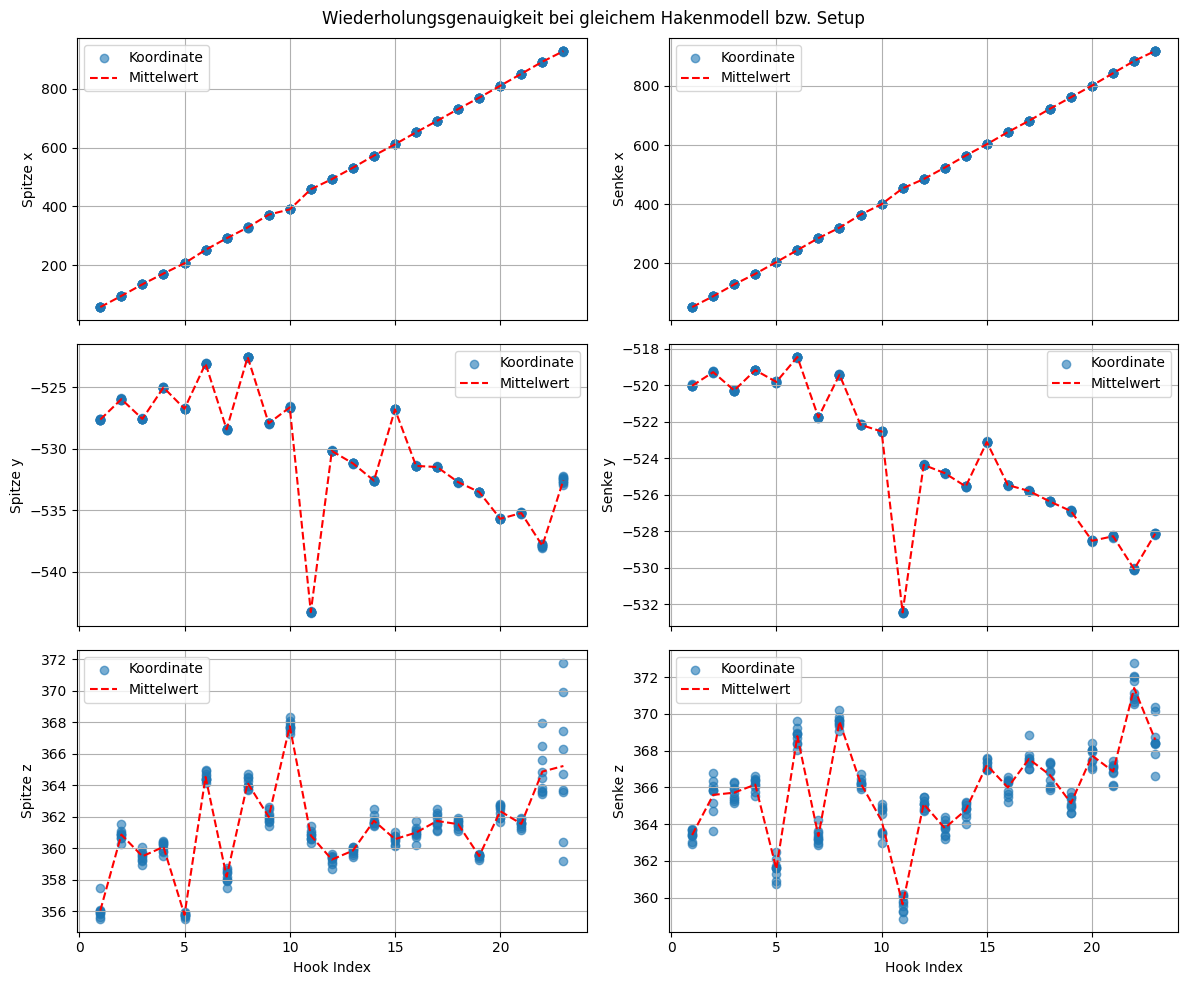

In [94]:
plot_values(dicts_list = dicts_list, tip_mean_list = mean_xyz_tip_in_workframe, lowpoint_mean_list = mean_xyz_lowpoint_in_workframe)

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_z_distribution(dicts_list, hook_num=1):
    """
    Plottet die Verteilung der z-Koordinaten der Spitzen über alle Haken und Messungen hinweg.
    Zeigt Histogramm + angepasste Normalverteilung sowie μ und σ im Plot.
    """
    z_values = []

    num_scans = len(dicts_list)

    # gehe alle Dicts durch und nehme überall den gleichen Haken heraus
    for scan_idx in range(num_scans):
        dict_key = str(scan_idx + 1)
        for scan_dict in dicts_list:
            z = scan_dict[dict_key]['xyz_tip_in_workframe'][2]
            z_values.append(z)            

    z_values = np.array(z_values)

    # Fit Normalverteilung
    mu, std = norm.fit(z_values)

    # Histogramm
    plt.figure(figsize=(8, 5))
    bins = int(np.ceil(np.log2(len(z_values)) + 1))  # Sturges-Regel
    count, bins, ignored = plt.hist(z_values, bins=bins, density=True, alpha=0.6,
                                     color='gray', edgecolor='black', label='Messwerte')

    # PDF der Normalverteilung -> Wahrscheinlichkeitsdichte berechnen
    x = np.linspace(min(bins), max(bins), 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label='Normalverteilung')

    # Anzeige der Parameter
    plt.title("Verteilung der z-Koordinaten (Tiefe)")
    plt.xlabel("z-Wert")
    plt.ylabel("Dichte")
    plt.legend()
    plt.text(0.95, 0.95, f'μ = {mu:.2f}\nσ = {std:.2f}',
             ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    plt.tight_layout()
    plt.show()

    return mu, std

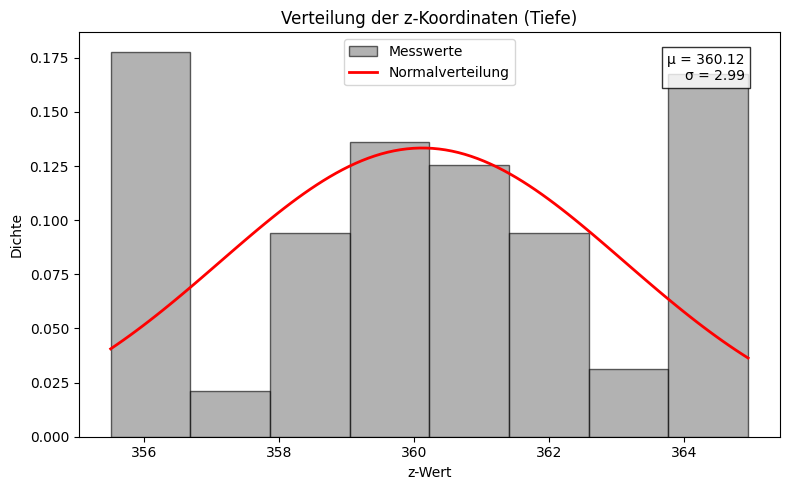

Mittelwert:  360.12229269920346
Standardabweichung:  2.991784784591854


In [122]:
z_mean, sigma = plot_z_distribution(dicts_list)
print("Mittelwert: ", z_mean)
print("Standardabweichung: ", sigma)

In [98]:
def probability_within_slot(dicts_list, slot_length=12):
    z_values = []

    for hook_idx in range(len(dicts_list[0])):
        dict_key = str(hook_idx + 1)
        for d in dicts_list:
            z = d[dict_key]['xyz_tip_in_workframe'][2]
            z_values.append(z)

    z_values = np.array(z_values)
    mu = np.mean(z_values)
    sigma = np.std(z_values, ddof=1)

    half_slot = slot_length / 2

    # Z-Werte für Grenzen
    lower_z = (mu - half_slot - mu) / sigma  # = -half_slot / sigma
    upper_z = (mu + half_slot - mu) / sigma  # = +half_slot / sigma

    # Wahrscheinlichkeit berechnen
    prob = norm.cdf(upper_z) - norm.cdf(lower_z)

    print(f"Ziel: z in [{mu - half_slot:.2f}, {mu + half_slot:.2f}]")
    print(f"Standardabweichung: σ = {sigma:.3f}")
    print(f"Wahrscheinlichkeit, dass eine z-Koordinate im Langloch liegt: {prob*100:.2f} %")

    return prob

In [101]:
probability_within_slot(dicts_list, slot_length = 12)

Ziel: z in [355.25, 367.25]
Standardabweichung: σ = 2.905
Wahrscheinlichkeit, dass eine z-Koordinate im Langloch liegt: 96.11 %


0.9611246944666225

# **Triangulationsmethoden**

In [161]:
horizontal_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/1_Horizontale-Triangulation/d_nah/global_hook_dict_horizontal.csv'
vertical_filepath = '/home/mo/Thesis/Evaluation/1_Scan-Prozess/1_Triangulationsmethoden/1_Horizontale-Triangulation/d_weit/global_hook_dict_horizontal.csv'

In [162]:
horizontal_dict = load_csv_to_dict(filename=horizontal_filepath)
vertical_dict = load_csv_to_dict(filename=vertical_filepath)

In [163]:
print(len(horizontal_dict))
print(len(vertical_dict))

23
23


In [164]:
def get_plot_values(dict1):
    """
    Holt die Werte für XYZ aus Dict und liefert Listen mit den Werten zurück, die dan geplottet werden können
    """
    xyz_hook_in_workframe_list = []
    xyz_tip_in_workframe_list = []
    xyz_lowpoint_in_workframe_list = []

    for idx, key in enumerate(dict1):
        xyz_hook_in_workframe_list.append(dict1[key]['xyz_hook_in_workframe'])
        xyz_tip_in_workframe_list.append(dict1[key]['xyz_tip_in_workframe'])
        xyz_lowpoint_in_workframe_list.append(dict1[key]['xyz_lowpoint_in_workframe'])

    return xyz_hook_in_workframe_list, xyz_tip_in_workframe_list, xyz_lowpoint_in_workframe_list

In [165]:
def calc_axiswise_differences(list1, list2):
    """
    Berechnet die absoluten Distanzen zwischen zwei 3D-Punktlisten achsenweise.
    
    Rückgabe:
        - dx: Liste der |x1 - x2| Werte
        - dy: Liste der |y1 - y2| Werte
        - dz: Liste der |z1 - z2| Werte
    """
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    
    diffs = arr1 - arr2  # shape: (n, 3)
    
    dx = diffs[:, 0].tolist()
    dy = diffs[:, 1].tolist()
    dz = diffs[:, 2].tolist()
    
    return dx, dy, dz

In [166]:
def calc_euclidean_distance(list1, list2):
    """
    Berechnet die euklidische Distanz der Punkte
    """
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    diffs = np.linalg.norm(arr1 - arr2, axis=1)
    return diffs.tolist()

In [167]:
xyz_hook1_in_workframe, xyz_tip1_in_workframe, xyz_lowpoint1_in_workframe = get_plot_values(dict1 = horizontal_dict)
xyz_hook2_in_workframe, xyz_tip2_in_workframe, xyz_lowpoint2_in_workframe = get_plot_values(dict1 = vertical_dict)
tip_euclidean_diff = calc_euclidean_distance(xyz_tip1_in_workframe, xyz_tip2_in_workframe)
dx, dy, dz = calc_axiswise_differences(xyz_tip1_in_workframe, xyz_tip2_in_workframe)

In [ ]:
def plot_3d_point(points1, points2, diff, dx, dy, dz, plottitle='Gesamtvergleich der Triangulationsmethoden'):
    """
    Zeichnet 3D-Vergleich der Punkte und rechts daneben zwei 2D-Plots:
    - oben: Gesamtdistanz
    - unten: Achsenweise Differenz (dx, dy, dz)
    """
    # In x, y, z aufteilen
    x_vals_1 = [p[0] for p in points1]
    y_vals_1 = [-p[1] for p in points1]
    z_vals_1 = [p[2] for p in points1]

    x_vals_2 = [p[0] for p in points2]
    y_vals_2 = [-p[1] for p in points2]
    z_vals_2 = [p[2] for p in points2]

    indices = list(range(len(diff)))

    fig = plt.figure(figsize=(18, 8))
    # fig.suptitle("Gesamtvergleich der Triangulationsergebnisse", fontsize=16, fontweight='bold')
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])
    
    ##### 3D-Plot links (beide Zeilen der linken Spalte)
    ax3d = fig.add_subplot(gs[:, 0], projection='3d')
    ax3d.scatter(x_vals_1, z_vals_1, y_vals_1, color='blue', s=60, label='horizontal')
    ax3d.scatter(x_vals_2, z_vals_2, y_vals_2, color='red', s=60, label='vertical')
    # Punkte beschriften mit Index
    for i, (x1, y1, z1) in enumerate(zip(x_vals_1, y_vals_1, z_vals_1)):
        ax3d.text(x1, z1, y1, f'{i+1}', color='black', fontsize=8)

    for i, (x2, y2, z2) in enumerate(zip(x_vals_2, y_vals_2, z_vals_2)):
        ax3d.text(x2, z2, y2, f'{i+1}', color='black', fontsize=8)
    ax3d.set_xlabel("X")
    ax3d.set_ylabel("Z")
    ax3d.set_zlabel("Y")
    ax3d.set_title("Vergleich Triangulationsverfahren Hakenspitze")
    ax3d.set_xlim([0, 1000])
    ax3d.set_ylim([200, 380])
    ax3d.set_zlim([0, 600])
    ax3d.legend()

    ##### 2D-Plot oben rechts (Gesamtdistanz)
    ax2d_1 = fig.add_subplot(gs[0, 1])
    ax2d_1.plot(indices, diff, label='euclidean distance', marker='o', color='green')
    ax2d_1.set_xlabel("Instanz")
    ax2d_1.set_ylabel("Distanz (Einheit)")
    ax2d_1.set_title("Euklidsche Distanz")
    ax2d_1.grid(True)
    ax2d_1.legend()

    ##### 2D-Plot unten rechts (dx, dy, dz)
    ax2d_2 = fig.add_subplot(gs[1, 1])
    ax2d_2.plot(indices, dx, label='dx', marker='o')
    ax2d_2.plot(indices, dy, label='dy', marker='s')
    ax2d_2.plot(indices, dz, label='dz', marker='^')
    ax2d_2.set_xlabel("Instanz")
    ax2d_2.set_ylabel("Abweichung")
    ax2d_2.set_title("Achsenweise Abweichung (horizontal - vertikal)")
    ax2d_2.grid(True)
    ax2d_2.legend()

    fig.suptitle(plottitle, fontsize=16, fontweight='bold', x=0.6)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

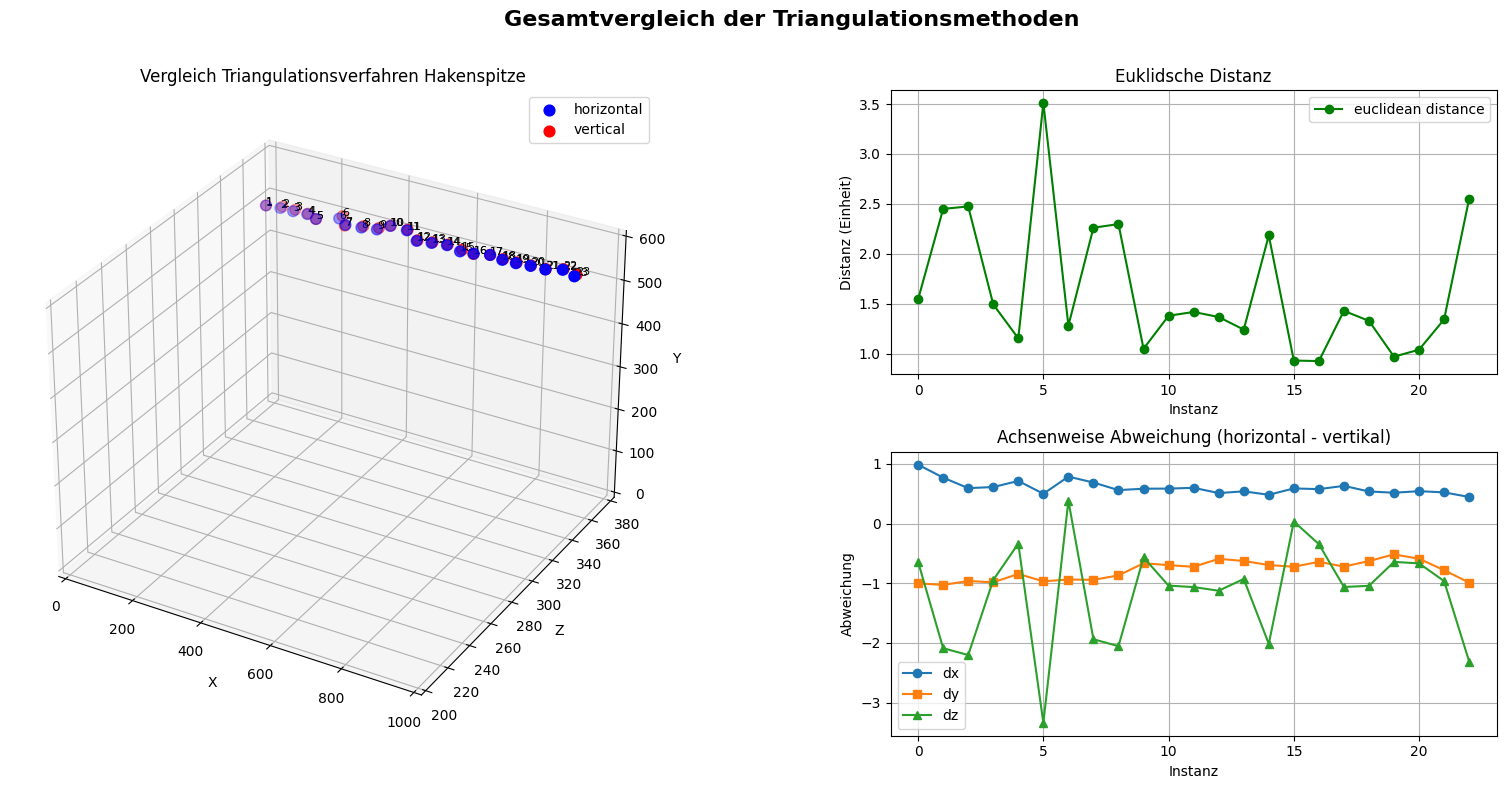

In [169]:
plot_3d_point(xyz_tip1_in_workframe, xyz_tip2_in_workframe, tip_euclidean_diff, dx, dy, dz)

In [170]:
def get_mean_of_axis_coords(list):
    """
    Berechnet den Mittelwert einer Koordinate über alle Instanzen hinweg"
    """
    x_vals = [p[0] for p in list]
    y_vals = [-p[1] for p in list]
    z_vals = [p[2] for p in list]

    x_mean = np.mean(x_vals)
    y_mean = np.mean(y_vals)
    z_mean = np.mean(z_vals)

    return x_mean, y_mean, z_mean

In [171]:
_, _, z_horizontal = get_mean_of_axis_coords(xyz_tip1_in_workframe)
_, _, z_vertical = get_mean_of_axis_coords(xyz_tip2_in_workframe)

In [172]:
print(z_horizontal)
print(z_vertical)

359.93575066002484
361.10472694674127
